In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 404290


<b><font size=5>Exploratory Data Analysis</font></b>

In [33]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [35]:
#question1 has 1 null value 
#question2 has 2 null values

In [36]:
#Let's locate which question1 was a null value
df[df.question1.isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [37]:
#The Null question1 has an qid1 = 493340. 
#Let's check if there is an instance of qid = 493340 is present anywhere in the dataset with a valid question attached to it.
df[(df.qid1 == 493340) | (df.qid2 == 493340)]

,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [38]:
#We cannot fill this null question1 with the correct question. It is better to delete the record.

In [39]:
#Let's check how many records are there where question2 is null
df[df.question2.isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [40]:
#The 2 instances of Null question2 have ids 174364. 
#Let's check if there is an instance of qid = 174364 is present anywhere in the dataset with a valid question attached to it.
df[(df.qid1 == 174364) | (df.qid2 == 174364)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [41]:
#We cannot fill this null question1 with the correct question. It is better to delete the record.

In [42]:
#Deleting records with null in qid1 or qid2
df = df.dropna(subset=['question1','question2'])

In [43]:
#Verifying the deletes
df[(df.question1.isnull()) | (df.question2.isnull())]

,id,qid1,qid2,question1,question2,is_duplicate


In [44]:
#Let's check if there are any records where qid1 == qid2
df[df.question1 == df.question2]

,id,qid1,qid2,question1,question2,is_duplicate


In [45]:
#Let's check if a qid1, qid2 pair is repeated more than once
pair_count = df.groupby(['qid1','qid2']).size()
pair_count[pair_count > 1]

Series([], dtype: int64)

In [46]:
#The above code will not capture the scenario if qid1 and qid2 are interchanged. 
#Let's see if there cases such as qid1=N1/qid2=N2 and qid1=N2/qid2=N1.
list_of_qids_1_2 = (df['qid1'].astype(str) + '-' + df['qid2'].astype(str)).tolist() 
list_of_qids_2_1 = (df['qid2'].astype(str) + '-' + df['qid1'].astype(str)).tolist()
combined_list = pd.Series(list_of_qids_1_2 + list_of_qids_2_1)
result = combined_list.duplicated()
result[result == True]

Series([], dtype: bool)

In [47]:
#Let's check how many unique instances of qid1 are there.
len(df.qid1.unique())

290652

In [48]:
#Let's check how many unique instances of qid2 are there.
len(df.qid2.unique())

299362

In [49]:
#Based on the above queries, a question might be repeated in more than one pair.

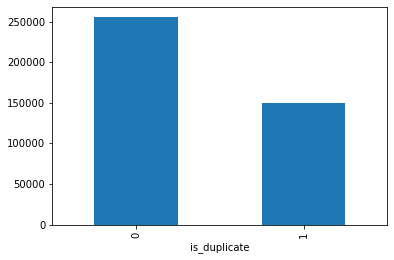

In [50]:
#Graph of duplicates vs non-duplicates
df.groupby("is_duplicate")['id'].count().plot.bar()

In [51]:
print('Not Duplicate Question Pairs (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\nDuplicate Question Pairs (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

Not Duplicate Question Pairs (is_duplicate = 0):
   63.08%

Duplicate Question Pairs (is_duplicate = 1):
   36.92%


In [52]:
#Average number of words per question
print('Mean question1 : ', df['question1'].str.split().apply(len).mean(), ' words')
print('Median question1 : ', df['question1'].str.split().apply(len).median(), ' words')
print('Mean question1 : ', df['question1'].str.split().apply(len).mean(), ' words')
print('Median question1 : ', df['question1'].str.split().apply(len).median(), ' words')

Mean question1 :  10.942256367382576  words
Median question1 :  10.0  words
Mean question1 :  10.942256367382576  words
Median question1 :  10.0  words


<b><font size=5>Feature Extraction</font></b>

In [53]:
#Frequency of qid1's
#df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count')

#Frequency of qid2's
#df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')

#Length of q1
#df['len_q1'] = df['question1'].str.len() 

#Length of q2
#df['len_q2'] = df['question2'].str.len()

#Number of words in q1
#df['words_q1'] = df['question1'].apply(lambda row: len(row.split(" ")))

#Number of words in q2
#df['words_q2'] = df['question2'].apply(lambda row: len(row.split(" ")))

#Words difference q1, q2
df['words_diff_q1_q2'] = abs(df['question1'].apply(lambda row: len(row.split(" "))) - df['question2'].apply(lambda row: len(row.split(" "))))

In [54]:
#Number of common unique words in Question 1 and Question 2
def normalized_word_Common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)
    
df['word_Common'] = df.apply(normalized_word_Common, axis=1)

In [76]:
#Total num of words in Question 1 + Total num of words in Question 2
def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    
df['word_Total'] = df.apply(normalized_word_Total, axis=1)    

In [77]:
#word_share = (word_common)/(word_Total)
def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
df['word_share'] = df.apply(normalized_word_share, axis=1)

In [78]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,words_diff_q1_q2,word_Common,word_Total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,2,10.0,23.0,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,5,4.0,20.0,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,4,4.0,24.0,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,2,0.0,19.0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,6,2.0,20.0,0.100000


In [80]:
df[df.is_duplicate == 1].head()

,id,qid1,qid2,question1,question2,is_duplicate,words_diff_q1_q2,word_Common,word_Total,word_share
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,0,8.0,31.0,0.258065
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,2,4.0,16.0,0.250000
11,11,23,24,How do I read and find my YouTube comments?,How can I see all my Youtube comments?,1,1,5.0,17.0,0.294118
12,12,25,26,What can make Physics easy to learn?,How can you make physics easy to learn?,1,1,6.0,15.0,0.400000
13,13,27,28,What was your first sexual experience like?,What was your first sexual experience?,1,1,5.0,13.0,0.384615


In [81]:
X = df.iloc[: , [6, 9]]
y = df.iloc[: , [5]]
X.head()

,words_diff_q1_q2,word_share
0,2,0.434783
1,5,0.200000
2,4,0.166667
3,2,0.000000
4,6,0.100000
...,...,...
404285,1,0.440000
404286,1,0.312500
404287,1,0.142857
404288,8,0.025000


In [82]:
#Splitting the dataset into the Training set and the Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [83]:
#Fitting Logistic Regression to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
#Predicting the Test set results
df_test = pd.read_csv("train.csv")
y_pred = classifier.predict(X_test)

In [85]:
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [86]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[51422, 12525],
       [22119, 15006]], dtype=int64)

In [87]:
(56191 + 7725)/((56191 + 7725) + (7756 + 29400))

0.6323808769985753